In [2]:
# import packages
import os
import geopandas as gp
import shapely
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from shapely.geometry import Point, Polygon

In [6]:
# Load the file
file_path = '/work/DigitalEquity/DATA/BDC_fixed.gpkg'
data = gp.read_file(file_path)

# Show the first few rows of the dataframe
data.head(10)

,building_type_code,land_use_code,provider_id,brand_name,technology,technology_name,max_advertised_download_speed,max_advertised_upload_speed,low_latency,business_residential_code,h3_9,up_down_ratio,geometry
0,R,4,130235,Charter Communications Inc,40,Cable,1000,35,1,R,8927636a07bffff,0.035,POINT (-85.50221 46.35000)
1,R,4,130235,Charter Communications Inc,40,Cable,1000,35,1,R,8927636a2b7ffff,0.035,POINT (-85.50681 46.35198)
2,X,4,130235,Charter Communications Inc,40,Cable,1000,35,1,B,8927636a2b3ffff,0.035,POINT (-85.51158 46.35514)
3,R,4,130235,Charter Communications Inc,40,Cable,1000,35,1,R,8927636a357ffff,0.035,POINT (-85.51040 46.33740)
4,R,4,130235,Charter Communications Inc,40,Cable,1000,35,1,R,8927636a07bffff,0.035,POINT (-85.50482 46.35135)
5,R,4,130235,Charter Communications Inc,40,Cable,1000,35,1,R,8927636a28fffff,0.035,POINT (-85.51827 46.35361)
6,R,4,130235,Charter Communications Inc,40,Cable,1000,35,1,R,8927636a2afffff,0.035,POINT (-85.51547 46.34843)
7,R,4,130235,Charter Communications Inc,40,Cable,1000,35,1,R,8927636a2a3ffff,0.035,POINT (-85.51327 46.35196)
8,R,4,130235,Charter Communications Inc,40,Cable,1000,35,1,R,8927636a2bbffff,0.035,POINT (-85.51765 46.35256)
9,R,4,130235,Charter Communications Inc,40,Cable,1000,35,1,R,8927636a2b3ffff,0.035,POINT (-85.51155 46.35360)


In [7]:
# Display the first few rows of the dataset
data.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 34390 entries, 0 to 34389
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   building_type_code             34390 non-null  object  
 1   land_use_code                  34390 non-null  int64   
 2   provider_id                    34390 non-null  int64   
 3   brand_name                     34390 non-null  object  
 4   technology                     34390 non-null  int64   
 5   technology_name                34390 non-null  object  
 6   max_advertised_download_speed  34390 non-null  int64   
 7   max_advertised_upload_speed    34390 non-null  int64   
 8   low_latency                    34390 non-null  int64   
 9   business_residential_code      34390 non-null  object  
 10  h3_9                           34390 non-null  object  
 11  up_down_ratio                  29073 non-null  float64 
 12  geometry                

In [8]:
data.describe()

,land_use_code,provider_id,technology,max_advertised_download_speed,max_advertised_upload_speed,low_latency,up_down_ratio
count,34390.000000,34390.000000,34390.000000,34390.000000,34390.000000,34390.000000,29073.000000
mean,1.807938,179550.063710,29.093632,546.602355,35.234109,0.604129,0.076771
std,1.215150,108728.891278,15.717497,491.221337,158.638445,0.489044,0.081479
min,0.000000,130077.000000,10.000000,0.000000,0.000000,0.000000,0.035000
25%,1.000000,130235.000000,10.000000,10.000000,1.000000,0.000000,0.035000
50%,1.000000,130235.000000,40.000000,500.000000,35.000000,1.000000,0.100000
75%,3.000000,160127.000000,40.000000,1000.000000,35.000000,1.000000,0.100000
max,7.000000,470022.000000,50.000000,5000.000000,5000.000000,1.000000,1.000000


In [19]:
print ('The dataset has {} rows and {} columns.'.format(data.shape[0], data.shape[1]))

The dataset has 34390 rows and 13 columns.


In [17]:
def load_data(filepath):
    """
    Load the dataset from a specified filepath and display basic information.
    
    Parameters:
        filepath (str): The path to the dataset file.
    
    Returns:
        GPDataFrame or DataFrame: Loaded data.
    """
    data = gp.read_file(filepath)
    print("Basic Information:")
    print(data.info())
    return data
    
data = load_data('/work/DigitalEquity/DATA/BDC_fixed.gpkg')

Basic Information:
<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 34390 entries, 0 to 34389
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   building_type_code             34390 non-null  object  
 1   land_use_code                  34390 non-null  int64   
 2   provider_id                    34390 non-null  int64   
 3   brand_name                     34390 non-null  object  
 4   technology                     34390 non-null  int64   
 5   technology_name                34390 non-null  object  
 6   max_advertised_download_speed  34390 non-null  int64   
 7   max_advertised_upload_speed    34390 non-null  int64   
 8   low_latency                    34390 non-null  int64   
 9   business_residential_code      34390 non-null  object  
 10  h3_9                           34390 non-null  object  
 11  up_down_ratio                  29073 non-null  float64 
 12  geome

In [15]:
def show_head(data, rows=5):
    """
    Display the first 'rows' entries of the DataFrame to get an initial impression of the data.
    
    Parameters:
        data (pd.DataFrame): The data to display.
        rows (int): Number of rows to display.
        
    Returns:
        pd.DataFrame: The first 'rows' of the data.
    """
    return data.head(rows)

data.head()

,building_type_code,land_use_code,provider_id,brand_name,technology,technology_name,max_advertised_download_speed,max_advertised_upload_speed,low_latency,business_residential_code,h3_9,up_down_ratio,geometry
0,R,4,130235,Charter Communications Inc,40,Cable,1000,35,1,R,8927636a07bffff,0.035,POINT (-85.50221 46.35000)
1,R,4,130235,Charter Communications Inc,40,Cable,1000,35,1,R,8927636a2b7ffff,0.035,POINT (-85.50681 46.35198)
2,X,4,130235,Charter Communications Inc,40,Cable,1000,35,1,B,8927636a2b3ffff,0.035,POINT (-85.51158 46.35514)
3,R,4,130235,Charter Communications Inc,40,Cable,1000,35,1,R,8927636a357ffff,0.035,POINT (-85.51040 46.33740)
4,R,4,130235,Charter Communications Inc,40,Cable,1000,35,1,R,8927636a07bffff,0.035,POINT (-85.50482 46.35135)


In [14]:
def summary_statistics(data):
    """
    Display summary statistics of the dataset, providing insights into the central tendency,
    dispersion, and shape of the dataset's numerical features.
    
    Parameters:
        data (pd.DataFrame): The data for which to generate summary statistics.
        
    Returns:
        pd.DataFrame: Summary statistics of the data.
    """
    return data.describe()

data.describe()

,land_use_code,provider_id,technology,max_advertised_download_speed,max_advertised_upload_speed,low_latency,up_down_ratio
count,34390.000000,34390.000000,34390.000000,34390.000000,34390.000000,34390.000000,29073.000000
mean,1.807938,179550.063710,29.093632,546.602355,35.234109,0.604129,0.076771
std,1.215150,108728.891278,15.717497,491.221337,158.638445,0.489044,0.081479
min,0.000000,130077.000000,10.000000,0.000000,0.000000,0.000000,0.035000
25%,1.000000,130235.000000,10.000000,10.000000,1.000000,0.000000,0.035000
50%,1.000000,130235.000000,40.000000,500.000000,35.000000,1.000000,0.100000
75%,3.000000,160127.000000,40.000000,1000.000000,35.000000,1.000000,0.100000
max,7.000000,470022.000000,50.000000,5000.000000,5000.000000,1.000000,1.000000


In [13]:
def missing_values(data):
    """
    Identify and count the number of missing values in each column of the dataset.
    
    Parameters:
        data (pd.DataFrame): The data to analyze for missing values.
        
    Returns:
        pd.DataFrame: A DataFrame listing the number of missing values per column.
    """
    return data.isnull().sum()
data.isnull().sum()

building_type_code                  0
land_use_code                       0
provider_id                         0
brand_name                          0
technology                          0
technology_name                     0
max_advertised_download_speed       0
max_advertised_upload_speed         0
low_latency                         0
business_residential_code           0
h3_9                                0
up_down_ratio                    5317
geometry                            0
dtype: int64

## **Data Exploration Results**
**Initial Observations**
- The Dataset composes of 34390 rows and 13 columnsData Types: Consist of both numerical (7 columns) and categorical (6 columns) types.
- Column Specifics:
Categorical Columns: 'building_type_code', 'brand_name', 'technology_name', 'business_residential_code', 'h3_9', 'geometry'.
- Numerical Columns: 'land_use_code', 'provider_id', 'technology', 'max_advertised_download_speed', 'max_advertised_upload_speed', 'low_latency', 'up_down_ratio'.
- Identifiers and Descriptive Features: 'h3_9' appears to be a geographic identifier, and 'geometry' contains coordinate data.

## **Statistics Insights:**
- **land_use_code**: Values range from 1 to 4, primarily centered around 4 (possibly indicating a specific type of land use, such as residential areas based on the context or domain knowledge).
- **Provider_id**: Two distinct provider IDs (130235 and 190070), which could imply services from two different companies or branches.
- **Technology**: A single technology type (40), which might correspond to a specific internet service type like cable. Detailed domain knowledge or metadata would be necessary to interpret this correctly.
- **Speed Metrics ('max_advertised_download_speed', 'max_advertised_upload_speed')**: 
    1. The download speed primarily peaks at 1000 Mbps, suggesting high-speed broadband service, with minimal entries at 25 Mbps indicating different service levels or legacy plans.
    2.Upload speeds vary significantly, suggesting different service plans or technologies affecting upload capabilities.
- **Low_latency**: All entries have a low latency feature enabled (1 for yes), which is crucial for real-time applications and indicates a quality service feature.
- **Up_down_ratio**: The upload to download speed ratio varies, which is crucial for applications requiring significant upload bandwidth like live streaming or cloud backups.

## **Detailed Exploratory Data Analysis (EDA)**

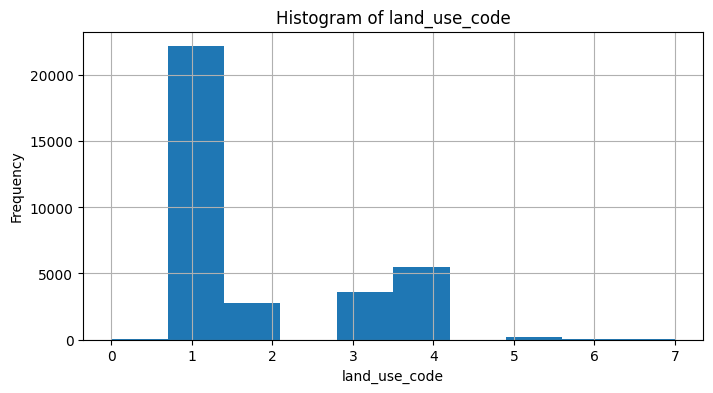

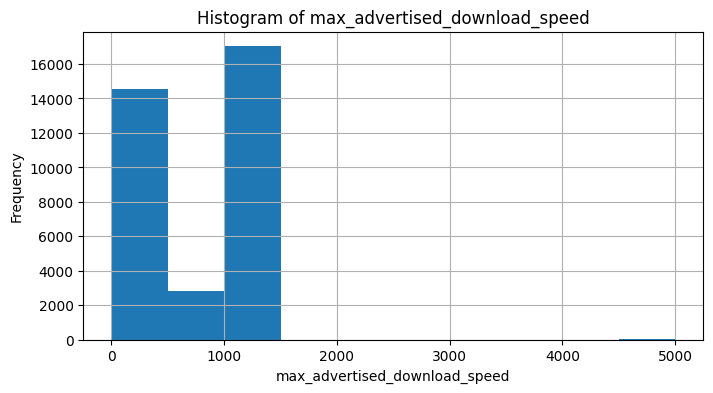

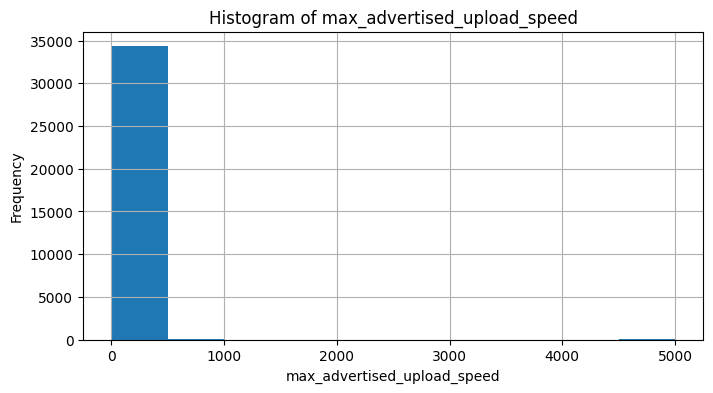

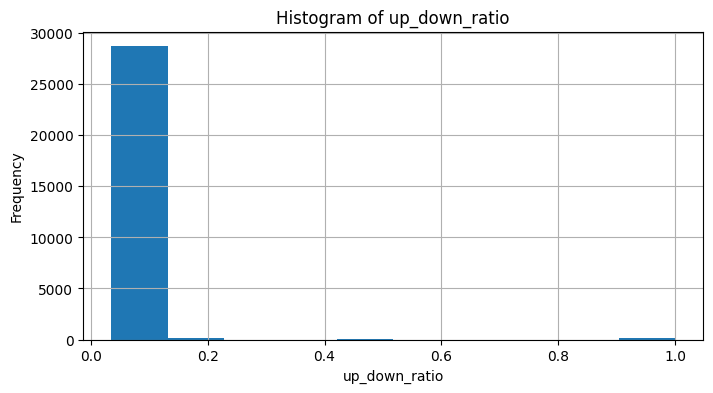

In [23]:
# histograms
def plot_histograms(data, columns):
    for column in columns:
        plt.figure(figsize=(8, 4))
        data[column].hist()
        plt.title(f'Histogram of {column}')
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.show()

# Numerical columns
numerical_columns = ['land_use_code', 'max_advertised_download_speed', 'max_advertised_upload_speed', 'up_down_ratio']
plot_histograms(data, numerical_columns)

**Histograms for Numerical Data**
- Land Use Code: This reveal a few discrete values since it's likely categorical represented as integers.
- Maximum Advertised Download Speed: Anticipate a high frequency at 1000 Mbps, suggesting most services are high-speed internet, with a few possibly at lower speeds like 25 Mbps indicating legacy or different service tiers.
- Maximum Advertised Upload Speed: This show a dual mode with peaks at around 35 Mbps and 100 Mbps, indicative of different service plans.
- Upload to Download Ratio: This show values clustering around a few ratios, potentially corresponding to the different service types offered.

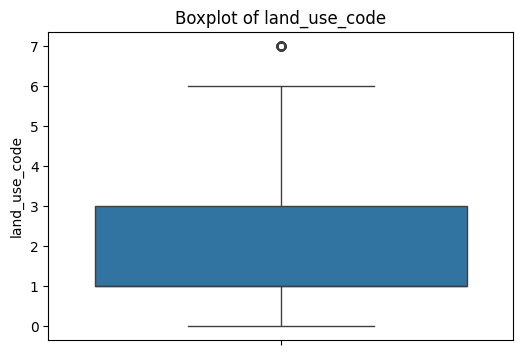

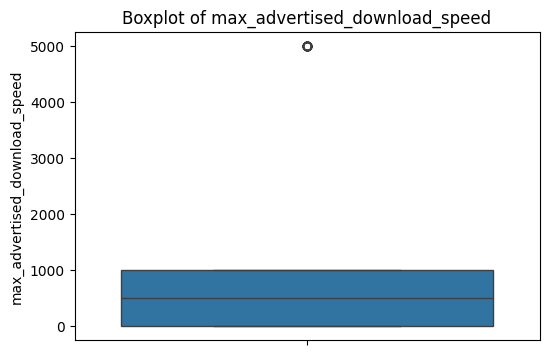

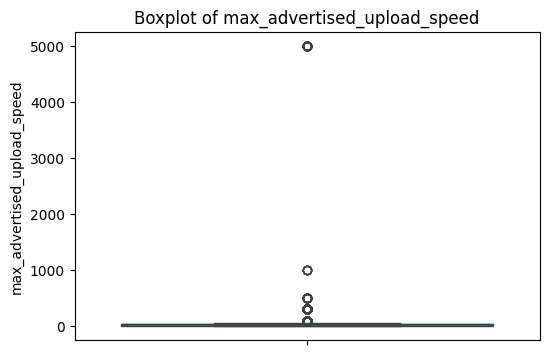

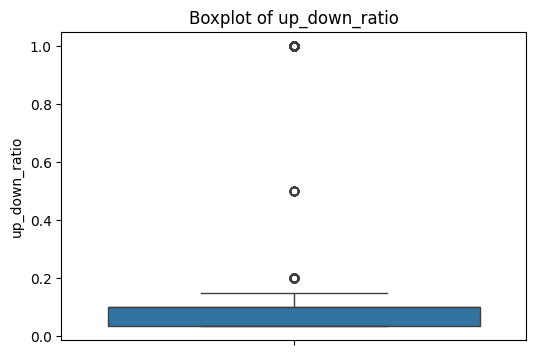

In [32]:
# Boxplots for numerical data
def plot_boxplots(data, columns):
    for column in columns:
        plt.figure(figsize=(6, 4))
        sns.boxplot(data[column])
        plt.title(f'Boxplot of {column}')
        plt.show()

plot_boxplots(data, numerical_columns)

**Boxplots**
These plots show the distribution of numerical data, help identify outliers and the spread of data:
- Land Use Code: Being quasi-categorical, outliers are less relevant, but spread might indicate multiple land use types.
- Speeds (Download and Upload): Look for outliers to understand if extremely high or low speeds are anomalies.
- Upload to Download Ratio: Outliers here could indicate unusual service offerings or data entry errors.

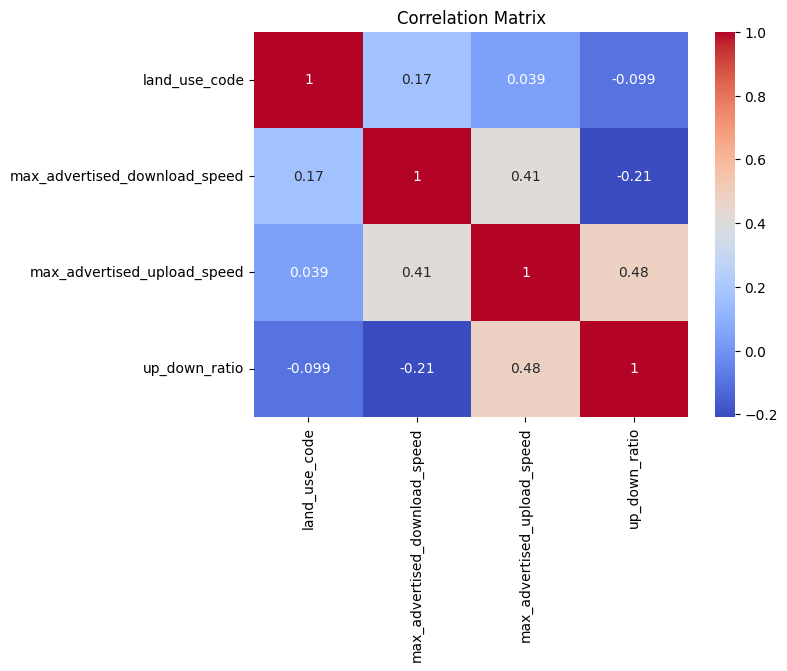

In [30]:
# Correlation matrix
plt.figure(figsize=(7, 5))
sns.heatmap(data[numerical_columns].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


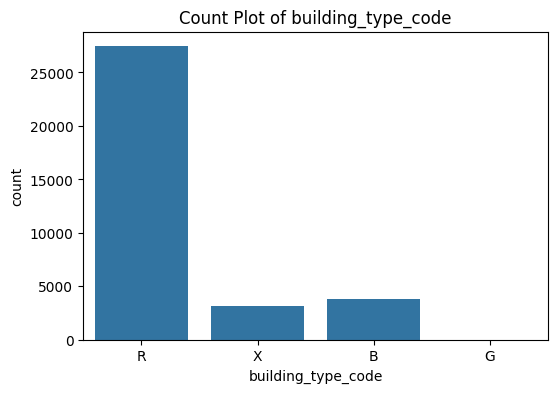

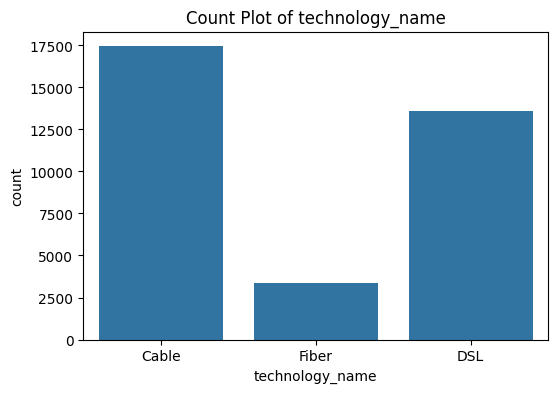

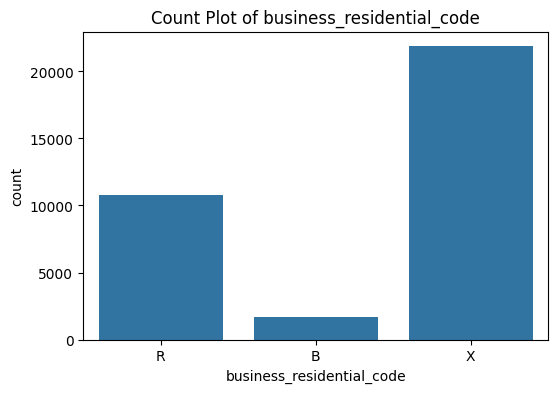

In [31]:
# Count plots for categorical data
categorical_columns = ['building_type_code', 'technology_name', 'business_residential_code']
for column in categorical_columns:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=data[column])
    plt.title(f'Count Plot of {column}')
    plt.show()

**Categorical Data Distribution**
Building Type Code: The counts of residential vs. commercial building types.
Technology Name: Distribution of technology types used (e.g., fiber, cable).
Business Residential Code: Typically will show the division between services offered to businesses vs. residential areas.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=b828342d-3de7-46aa-b87a-bd160a6c7e7e' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>